## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import warnings

In [2]:
pd.options.display.float_format = '{:.2f}'.format # Show dataframe outputs with 2 decimal float
warnings.simplefilter(action="ignore")
plt.style.use('seaborn')

In [3]:
Data = pd.read_csv("E:\hamid\hushe masnue imt1\Data\Linear Regression project Car data\cardata.csv")
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


We don't have any Missing Values

In [5]:
Data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


## Preprocessing

In [6]:
# change column year to age
Data["Year"]

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [7]:
Data["Year"].max()

2018

In [8]:
Data["Age"] = 2019 - Data["Year"] # change year to age to 2019
Data.drop("Year", axis=1, inplace=True)

In [9]:
Data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


## Type of Columns

### Categorical

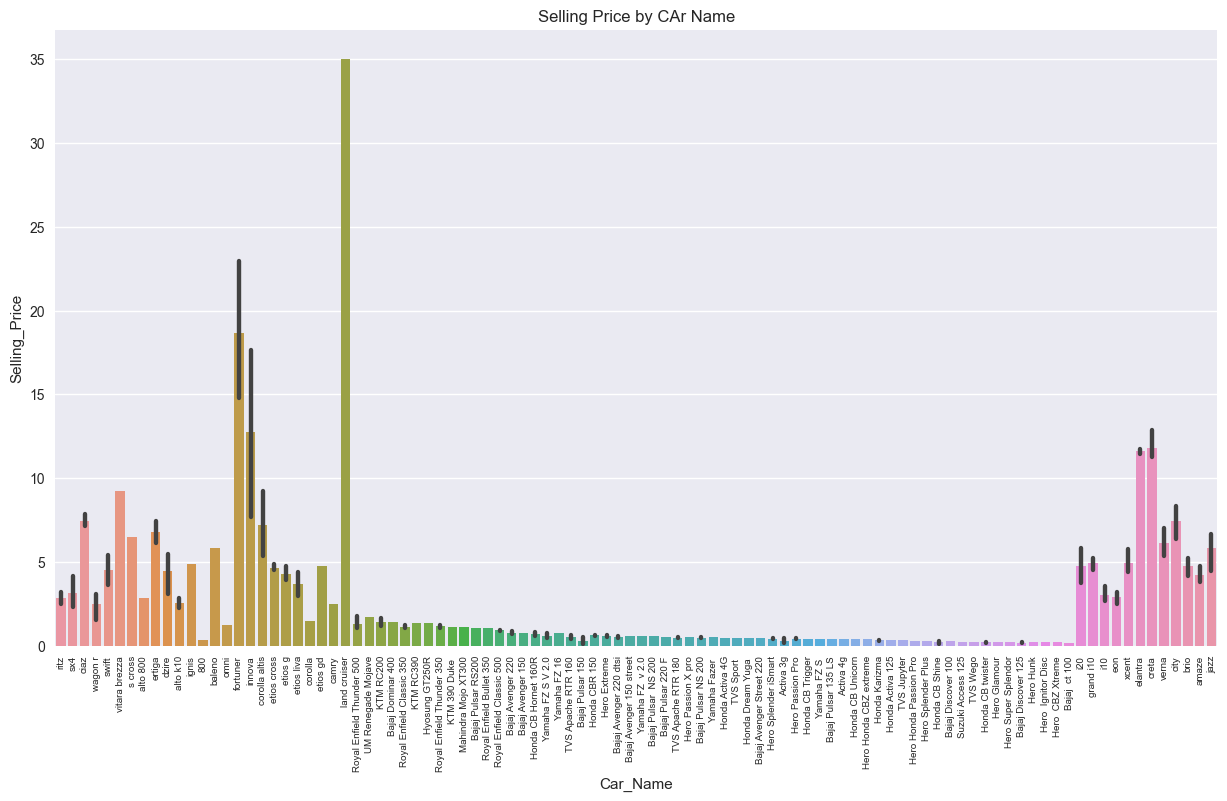

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(Data.Car_Name, Data.Selling_Price, data=Data)
plt.title("Selling Price by CAr Name")
plt.xticks(rotation=90, fontsize=7)
plt.show()

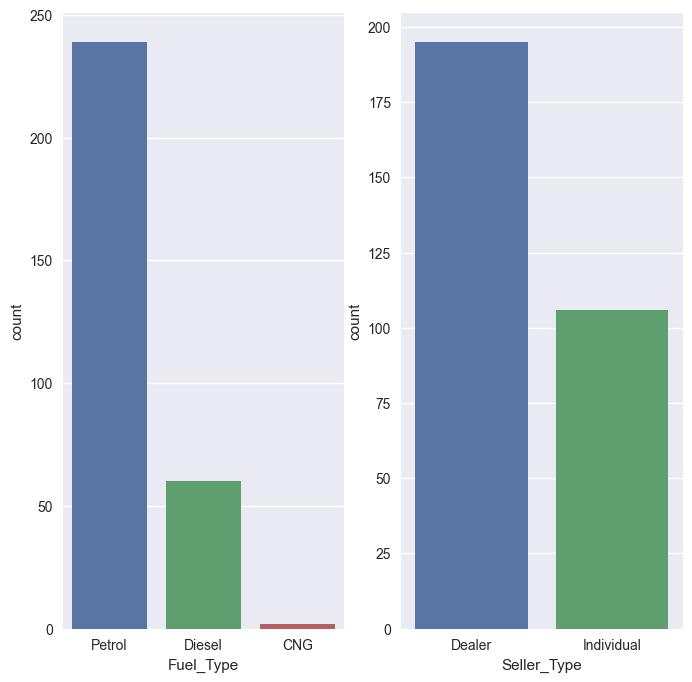

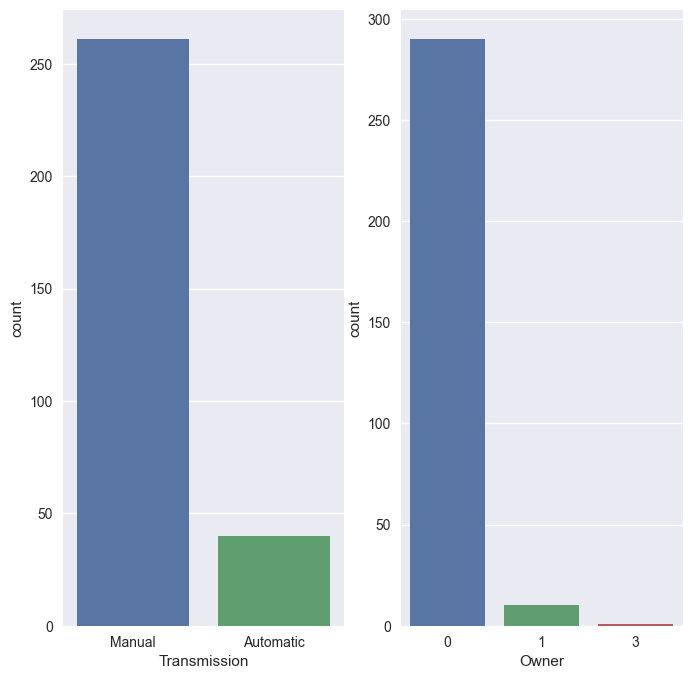

In [11]:
categorical = ["Fuel_Type", "Seller_Type", "Transmission", "Owner"]
i = 0
while i < 4 :
    fig = plt.figure(figsize=[8,8])
    plt.subplot(1, 2, 1)
    sns.countplot(x=categorical[i], data=Data)
    i += 1
    plt.subplot(1, 2, 2)
    sns.countplot(x=categorical[i], data=Data)
    i += 1
    plt.show()
    

## Numerical

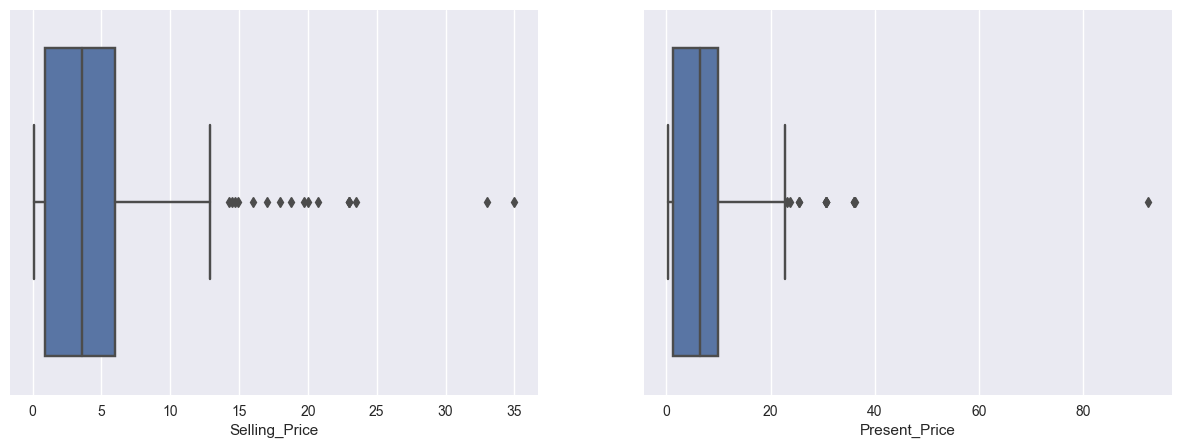

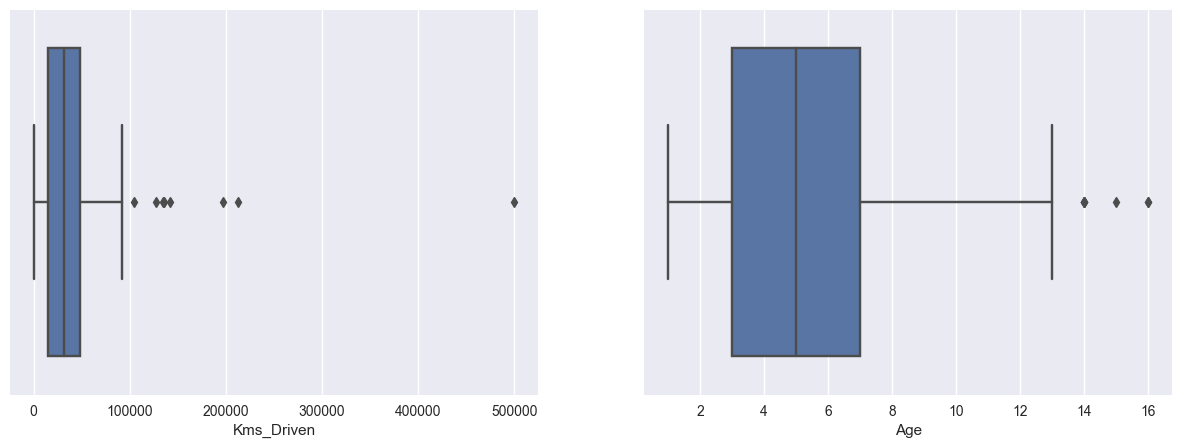

In [12]:
Numerical = ["Selling_Price", "Present_Price", "Kms_Driven", "Age" ]
i = 0
while i < 4 :
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1, 2, 1)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.subplot(1, 2, 2)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.show()
    

In [13]:
Data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.00,0.88,0.03,-0.09,-0.24
Present_Price,0.88,1.00,0.20,0.01,0.05
Kms_Driven,0.03,0.20,1.00,0.09,0.52
Owner,-0.09,0.01,0.09,1.00,0.18
Age,-0.24,0.05,0.52,0.18,1.00


In [14]:
print("Fuel type Unique: ",Data.Fuel_Type.unique())
print("Seller type Unique: ",Data.Seller_Type.unique())
print("Transmission Unique: ",Data.Transmission.unique())
print("Owner Unique: ",Data.Owner.unique())

Fuel type Unique:  ['Petrol' 'Diesel' 'CNG']
Seller type Unique:  ['Dealer' 'Individual']
Transmission Unique:  ['Manual' 'Automatic']
Owner Unique:  [0 1 3]


In [15]:
Data.Fuel_Type.replace({'Petrol' :2, 'Diesel' :3, 'CNG' :4}, inplace = True)
Data.Seller_Type.replace({'Dealer':2, 'Individual':3}, inplace=True)
Data.Transmission.replace({'Manual':2, 'Automatic':3}, inplace = True)
Data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,2,2,0,5
1,sx4,4.75,9.54,43000,3,2,2,0,6
2,ciaz,7.25,9.85,6900,2,2,2,0,2
3,wagon r,2.85,4.15,5200,2,2,2,0,8
4,swift,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,3
297,brio,4.00,5.90,60000,2,2,2,0,4
298,city,3.35,11.00,87934,2,2,2,0,10
299,city,11.50,12.50,9000,3,2,2,0,2


In [16]:
Data.drop("Car_Name", axis=1, inplace=True)
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


## Creat Model

In [17]:
x = pd.DataFrame(Data, columns=["Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner","Age"])
y = Data.Selling_Price.values.reshape(-1,1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("x_train Shape : ", x_train.shape)
print("x_test Shape : ", x_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

x_train Shape :  (240, 7)
x_test Shape :  (61, 7)
y_train Shape :  (240, 1)
y_test Shape :  (61, 1)


In [19]:
slr = LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = slr.predict(x_test)

In [21]:
print ("MAE : %.6f" % metrics.mean_absolute_error(y_test , y_pred))
print ("MSE : %.6f" % metrics.mean_squared_error(y_test , y_pred))
print ("RMSE : %.6f" % np.sqrt(metrics.mean_absolute_error(y_test , y_pred)))
print ("R2Score : %.6f" % metrics.r2_score(y_test , y_pred))

MAE : 1.000033
MSE : 2.188556
RMSE : 1.000016
R2Score : 0.913418


In [22]:
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,2,2,2,0,5
1,9.54,43000,3,2,2,0,6
2,9.85,6900,2,2,2,0,2
3,4.15,5200,2,2,2,0,8
4,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...
296,11.60,33988,3,2,2,0,3
297,5.90,60000,2,2,2,0,4
298,11.00,87934,2,2,2,0,10
299,12.50,9000,3,2,2,0,2


# Dimension X^2

In [23]:
# Make Function for evaluate high degree of features
def check(Dimension, testsize):
    r2 = 0.913418
    for columns in x :
        new_col_Name = columns + str(Dimension)
        new_col_values = x[columns]**Dimension
        x.insert(0, new_col_Name, new_col_values)
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=testsize, random_state=0)
        new_model = LinearRegression()
        new_model.fit(x_train, y_train)
        y_pred = new_model.predict(x_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            x.drop(new_col_Name, axis=1, inplace=True)
        else:
            r2 = r2_new
    print("R2 Score :", r2)
    
check(2,.2)
        

R2 Score : 0.9311515303255018


In [24]:
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.25,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.01,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.02,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.22,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.20,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.56,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.81,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.00,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.25,12.50,9000,3,2,2,0,2


# Another way : DotProduct Features

### Don't Use loop for this part if you have limitted features

In [25]:
Pres_Kms = x["Present_Price"] * x["Kms_Driven"]
Pres_Kms2 = x["Present_Price"] * x["Kms_Driven2"]
Pres_Fuel = x["Present_Price"] * x["Fuel_Type"]
Pres_Fuel2 = x["Present_Price"] * x["Fuel_Type2"]
Pres2_Kms = x["Present_Price2"] * x["Kms_Driven"]
Pres2_Kms2 = x["Present_Price2"] * x["Kms_Driven2"]
Pres2_Fuel = x["Present_Price2"] * x["Fuel_Type"]
Pres2_Fuel2 = x["Present_Price2"] * x["Fuel_Type2"]

In [26]:
x.insert(0, "Pres_Kms", Pres_Kms)
x.insert(0, "Pres_Kms2", Pres_Kms2)
x.insert(0, "Pres_Fuel", Pres_Fuel)
x.insert(0, "Pres_Fuel2", Pres_Fuel2)
x.insert(0, "Pres2_Kms", Pres2_Kms)
x.insert(0, "Pres2_Kms2", Pres2_Kms2)
x.insert(0, "Pres2_Fuel", Pres2_Fuel)
x.insert(0, "Pres2_Fuel2", Pres2_Fuel2)
x

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.99,62.50,22779864900.00,843698.70,22.36,11.18,4075110000.00,150930.00,0,4,729000000,31.25,5.59,27000,2,2,2,0,5
1,819.10,273.03,168280448400.00,3913498.80,85.86,28.62,17639460000.00,410220.00,0,9,1849000000,91.01,9.54,43000,3,2,2,0,6
2,388.09,194.04,4619241225.00,669455.25,39.40,19.70,468958500.00,67965.00,0,4,47610000,97.02,9.85,6900,2,2,2,0,2
3,68.89,34.45,465696400.00,89557.00,16.60,8.30,112216000.00,21580.00,0,4,27040000,17.22,4.15,5200,2,2,2,0,8
4,424.77,141.59,85048931792.25,2003508.41,61.83,20.61,12379757175.00,291631.50,0,9,1802002500,47.20,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.04,403.68,155441578416.64,4573425.28,104.40,34.80,13400136070.40,394260.80,0,9,1155184144,134.56,11.60,33988,3,2,2,0,3
297,139.24,69.62,125316000000.00,2088600.00,23.60,11.80,21240000000.00,354000.00,0,4,3600000000,34.81,5.90,60000,2,2,2,0,4
298,484.00,242.00,935618991076.00,10640014.00,44.00,22.00,85056271916.00,967274.00,0,4,7732388356,121.00,11.00,87934,2,2,2,0,10
299,1406.25,468.75,12656250000.00,1406250.00,112.50,37.50,1012500000.00,112500.00,0,9,81000000,156.25,12.50,9000,3,2,2,0,2


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("MAE : %.6f" % metrics.mean_absolute_error(y_test , y_pred))
print ("MSE : %.6f" % metrics.mean_squared_error(y_test , y_pred))
print ("RMSE : %.6f" % np.sqrt(metrics.mean_absolute_error(y_test , y_pred)))
print ("R2Score : %.6f" % metrics.r2_score(y_test , y_pred))

MAE : 0.726388
MSE : 1.192745
RMSE : 0.852284
R2Score : 0.952814


In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(5)
resault = cross_val_score(model, x, y, cv=k_fold)
print(resault)

[  0.92455681   0.47744758 -23.72864089   0.58594622   0.8865601 ]


In [29]:
len(x)/5

60.2

In [30]:
df = x[x.index < 100]
df2 = x[x.index > 151]
x_new = df.append(df2)
x_new.reset_index(drop=True, inplace=True)
x_new

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.99,62.50,22779864900.00,843698.70,22.36,11.18,4075110000.00,150930.00,0,4,729000000,31.25,5.59,27000,2,2,2,0,5
1,819.10,273.03,168280448400.00,3913498.80,85.86,28.62,17639460000.00,410220.00,0,9,1849000000,91.01,9.54,43000,3,2,2,0,6
2,388.09,194.04,4619241225.00,669455.25,39.40,19.70,468958500.00,67965.00,0,4,47610000,97.02,9.85,6900,2,2,2,0,2
3,68.89,34.45,465696400.00,89557.00,16.60,8.30,112216000.00,21580.00,0,4,27040000,17.22,4.15,5200,2,2,2,0,8
4,424.77,141.59,85048931792.25,2003508.41,61.83,20.61,12379757175.00,291631.50,0,9,1802002500,47.20,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.04,403.68,155441578416.64,4573425.28,104.40,34.80,13400136070.40,394260.80,0,9,1155184144,134.56,11.60,33988,3,2,2,0,3
245,139.24,69.62,125316000000.00,2088600.00,23.60,11.80,21240000000.00,354000.00,0,4,3600000000,34.81,5.90,60000,2,2,2,0,4
246,484.00,242.00,935618991076.00,10640014.00,44.00,22.00,85056271916.00,967274.00,0,4,7732388356,121.00,11.00,87934,2,2,2,0,10
247,1406.25,468.75,12656250000.00,1406250.00,112.50,37.50,1012500000.00,112500.00,0,9,81000000,156.25,12.50,9000,3,2,2,0,2


In [31]:
y = Data["Selling_Price"]
y1 = y[y.index <100]
y2 = y[y.index > 151]
y_new = y1.append(y2)
y_new.reset_index(drop=True, inplace=True)
y_new.shape

(249,)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print ("MAE : %.6f" % metrics.mean_absolute_error(y_test , y_pred))
print ("MSE : %.6f" % metrics.mean_squared_error(y_test , y_pred))
print ("RMSE : %.6f" % np.sqrt(metrics.mean_absolute_error(y_test , y_pred)))
print ("R2Score : %.6f" % metrics.r2_score(y_test , y_pred))

MAE : 0.674801
MSE : 0.840360
RMSE : 0.821463
R2Score : 0.977137


In [33]:
x_test

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,139.24,69.62,1039262853.76,190201.84,23.60,11.80,176146246.40,32237.60,0,4,29855296,34.81,5.90,5464,2,2,2,0,3
168,78.50,39.25,29070877443.39,755323.15,17.72,8.86,6562274817.92,170501.84,0,4,1481326144,19.62,4.43,38488,2,2,2,0,2
76,862.01,431.00,1117164441600.00,15516172.80,58.72,29.36,76101120000.00,1056960.00,0,4,5184000000,215.50,14.68,72000,2,2,2,0,6
150,129.96,64.98,25837347600.00,916218.00,22.80,11.40,4532868000.00,160740.00,0,4,795240000,32.49,5.70,28200,2,2,2,0,4
145,1.04,0.52,283248900.00,8583.30,2.04,1.02,555390000.00,16830.00,0,4,1089000000,0.26,0.51,33000,2,3,2,0,9
73,130.42,65.21,60284980900.00,1401976.30,22.84,11.42,10557790000.00,245530.00,0,4,1849000000,32.60,5.71,43000,2,2,2,0,8
45,579.85,289.92,32616360000.00,2174424.00,48.16,24.08,2709000000.00,180600.00,0,4,225000000,144.96,12.04,15000,2,2,3,0,5
159,1968.70,656.23,414584866971.02,9523024.39,133.11,44.37,28031431167.75,643882.65,0,9,1895296225,218.74,14.79,43535,3,2,2,0,4
218,400.00,200.00,480817428100.00,6934100.00,40.00,20.00,48081742810.00,693410.00,0,4,4808174281,100.00,10.00,69341,2,2,2,0,8
213,302.76,151.38,34018113600.00,1604628.00,34.80,17.40,3910128000.00,184440.00,0,4,449440000,75.69,8.70,21200,2,2,2,0,2


In [34]:
x_test.insert(0, "y_test", y_test)
x_test.insert(0,"y_pred", y_pred)
x_test

,y_pred,y_test,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,...,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,5.05,5.30,139.24,69.62,1039262853.76,190201.84,23.60,11.80,176146246.40,32237.60,...,4,29855296,34.81,5.90,5464,2,2,2,0,3
168,3.91,3.50,78.50,39.25,29070877443.39,755323.15,17.72,8.86,6562274817.92,170501.84,...,4,1481326144,19.62,4.43,38488,2,2,2,0,2
76,5.34,5.50,862.01,431.00,1117164441600.00,15516172.80,58.72,29.36,76101120000.00,1056960.00,...,4,5184000000,215.50,14.68,72000,2,2,2,0,6
150,4.21,4.40,129.96,64.98,25837347600.00,916218.00,22.80,11.40,4532868000.00,160740.00,...,4,795240000,32.49,5.70,28200,2,2,2,0,4
145,-0.53,0.16,1.04,0.52,283248900.00,8583.30,2.04,1.02,555390000.00,16830.00,...,4,1089000000,0.26,0.51,33000,2,3,2,0,9
73,2.81,2.65,130.42,65.21,60284980900.00,1401976.30,22.84,11.42,10557790000.00,245530.00,...,4,1849000000,32.60,5.71,43000,2,2,2,0,8
45,9.41,7.50,579.85,289.92,32616360000.00,2174424.00,48.16,24.08,2709000000.00,180600.00,...,4,225000000,144.96,12.04,15000,2,2,3,0,5
159,10.40,11.75,1968.70,656.23,414584866971.02,9523024.39,133.11,44.37,28031431167.75,643882.65,...,9,1895296225,218.74,14.79,43535,3,2,2,0,4
218,3.81,4.10,400.00,200.00,480817428100.00,6934100.00,40.00,20.00,48081742810.00,693410.00,...,4,4808174281,100.00,10.00,69341,2,2,2,0,8
213,6.98,6.50,302.76,151.38,34018113600.00,1604628.00,34.80,17.40,3910128000.00,184440.00,...,4,449440000,75.69,8.70,21200,2,2,2,0,2


In [35]:
new_df = x_test.sort_values(by='Present_Price')

In [36]:
a = new_df.Present_Price
b = new_df.y_test
c = new_df.Present_Price
d = new_df.y_pred

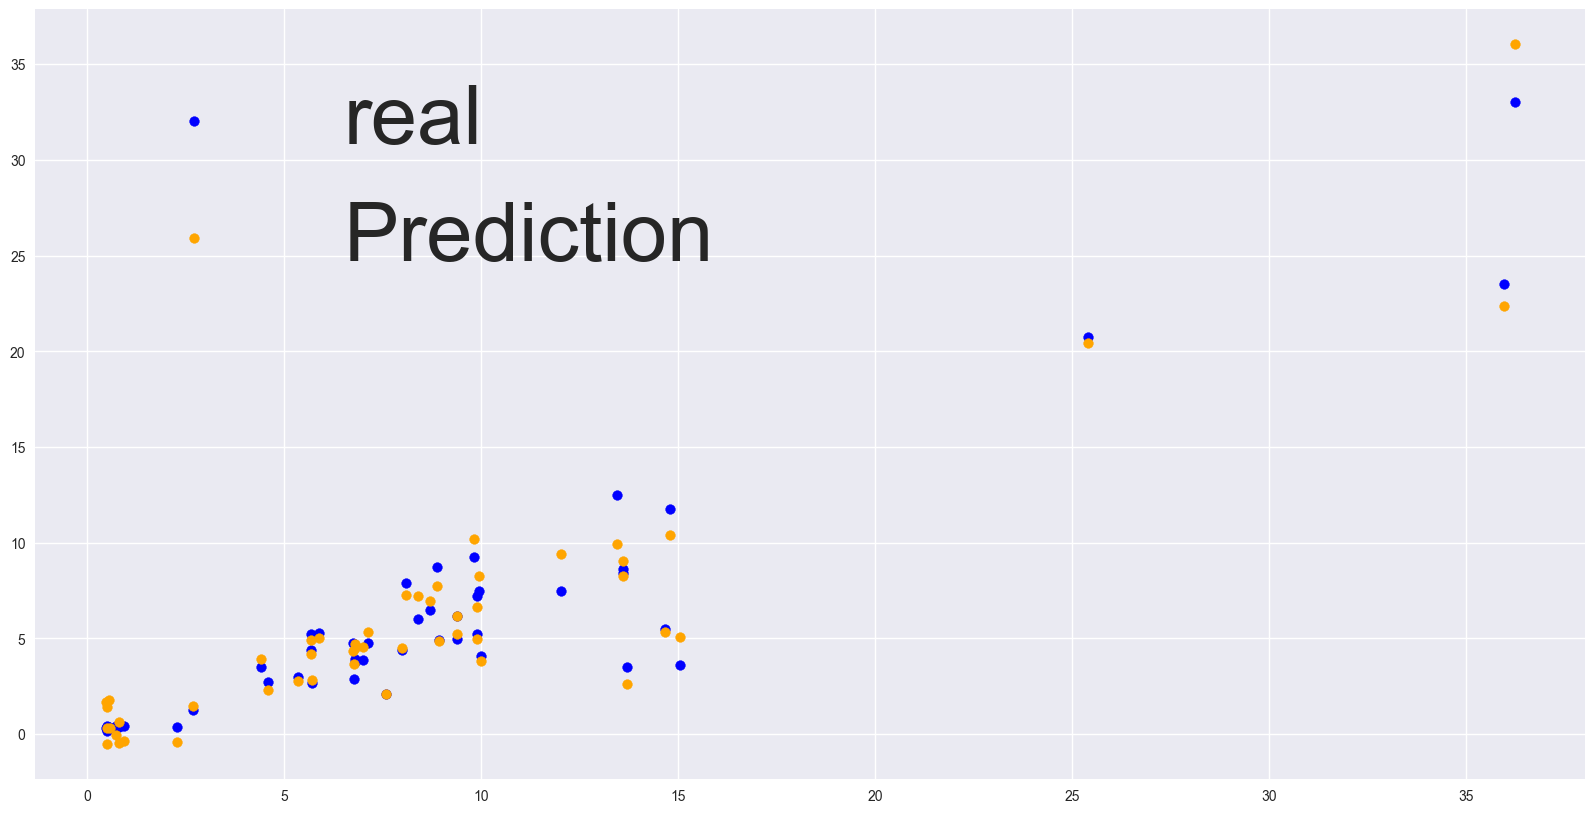

In [37]:
plt.figure(figsize=(20, 10))
plt.scatter(a,b,color='blue', label = 'real')
plt.scatter(c,d, color='orange', label = 'Prediction')
plt.legend(loc='best', fontsize=60)
plt.show()

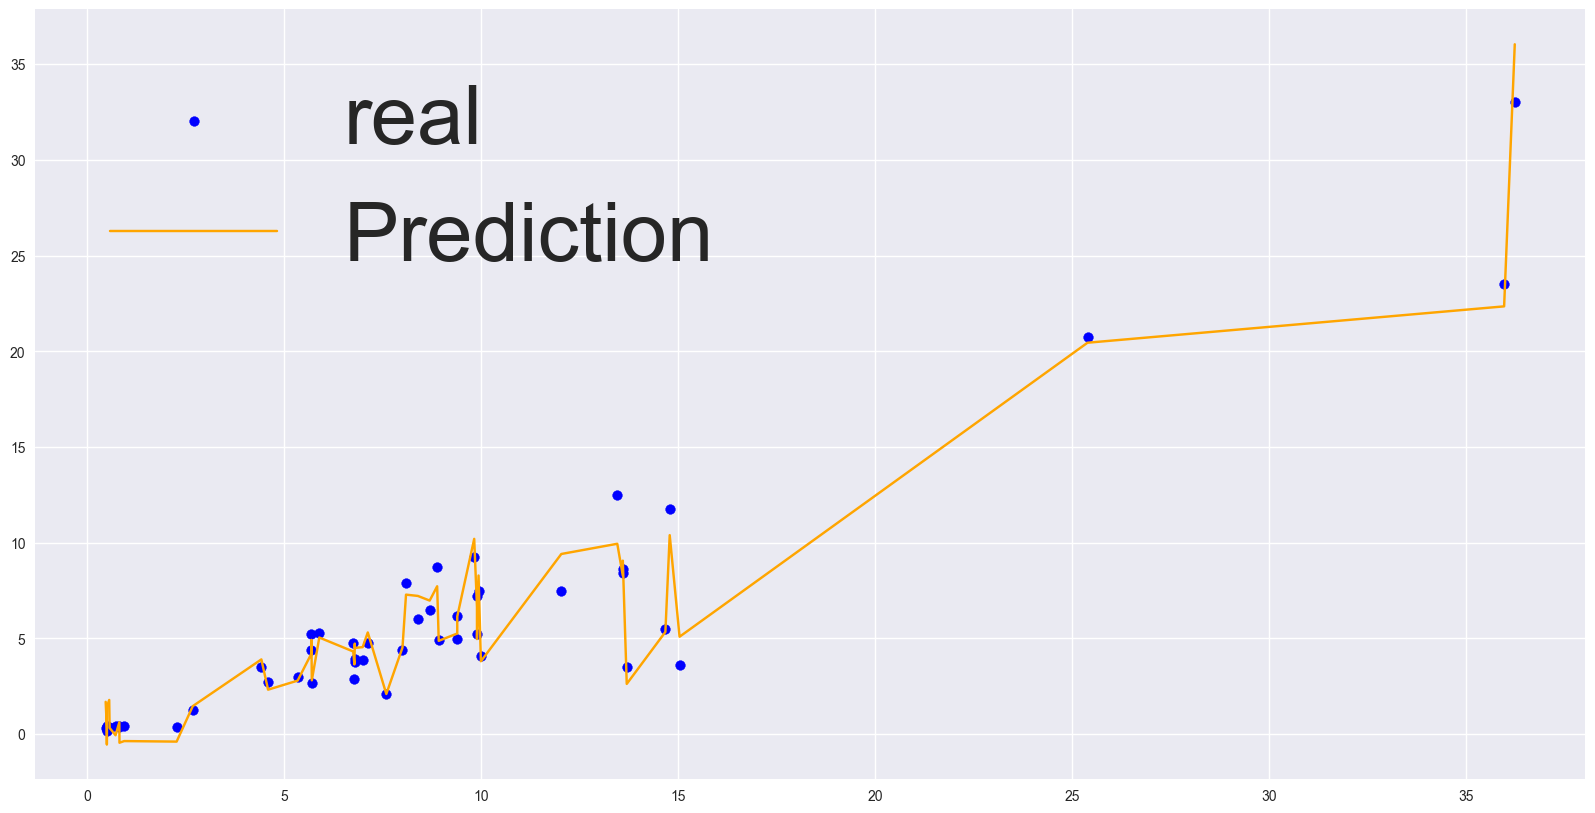

In [38]:
plt.figure(figsize=(20, 10))
plt.scatter(a,b,color='blue', label = 'real')
plt.plot(c,d, color='orange', label = 'Prediction')
plt.legend(loc='best', fontsize=60)
plt.show()

## Predict new Data

In [39]:
Pres_Pri = 11.23
Kms_Dri = 42000
Fuel_Ty = 2 #Petrol
Seller_Ty = 2 #Dealer
Transmis =2 #Manual
Own = 1
Ag =10

Model_input1 = pd.DataFrame({
                           "Pres2_Fuel2":[((Pres_Pri**2)*(Fuel_Ty**2))],
                            "Pres2_Fuel":[((Pres_Pri)**2)*(Fuel_Ty)],
                            "Pres2_Kms2":[((Pres_Pri)**2)*((Kms_Dri)**2)],
                            "Pres2_Kms":[((Pres_Pri)**2)*(Kms_Dri)],
                            "Pres_Fuel2":[(Pres_Pri)*((Fuel_Ty)**2)],
                            "Pres_Fuel":[(Pres_Pri)*(Fuel_Ty)],
                            "Pres_Kms2":[(Pres_Pri)*((Kms_Dri)**2)],
                            "Pres_Kms":[(Pres_Pri)*(Kms_Dri)],
                            "Owner2":[(Own)**2],
                            "Fuel_Type2":[(Fuel_Ty)**2],
                            "Kms_Driven2":[(Kms_Dri)**2],
                            "Present_Price2":[(Pres_Pri)**2],
                            "Present_Price":[Pres_Pri],
                            "Kms_Driven":[Kms_Dri],
                            "Fuel_Type":[Fuel_Ty],
                            "Seller_Type":[Seller_Ty],
                            "Transmission":[Transmis],
                            "Owner":[Own],
                            "Age":[Ag]})

In [40]:
y_pred_new = lr.predict(Model_input1)
print("New Car Prediction is : ", (y_pred_new[0].round(3))*1000, '$')

New Car Prediction is :  5315.0 $
